In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import matplotlib.gridspec as gridspec

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from plot_tools import *

# Helper functions......

def add_fhour(ds):
    
    filename = ds.encoding["source"].split("_")
    
    init_time = int(filename[-2])
    fhour     = int(filename[-1][-5:-3])
        
    ds.coords['fhour'] = fhour
    ds.coords['init_time'] = init_time
    
    return ds
    

def open_mfdataset_list(data_dir, pattern):
    """
    Use xarray.open_mfdataset to read multiple netcdf files from a list.
    """
    filelist = os.path.join(data_dir,pattern)
    return xr.open_mfdataset(filelist, preprocess=add_fhour, combine='nested', concat_dim=['fhour'],parallel=True)




====> Begin processing runs


----> Processing for day:  2019071918 

Processing 2019071918 for fhour 5

Plot Lat Min: 44.0  Lat Max:  49.0  

Plot Lon Min: -92.0  Lon Max:  -87.0


Plot Lat Min: 44.0  Lat Max:  49.0  

Plot Lon Min: -92.0  Lon Max:  -87.0

Saved /work/wicker/CAM_case_studies/2019071918_W_500_zoom.png

----> Processing for day:  2020081006 

Processing 2020081006 for fhour 5

Plot Lat Min: 39.0  Lat Max:  44.0  

Plot Lon Min: -92.0  Lon Max:  -86.0



/home/louis.wicker/miniconda3/envs/main/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,



Plot Lat Min: 39.0  Lat Max:  44.0  

Plot Lon Min: -92.0  Lon Max:  -86.0



/home/louis.wicker/miniconda3/envs/main/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Saved /work/wicker/CAM_case_studies/2020081006_W_500_zoom.png

----> Processing for day:  2020070700 

Processing 2020070700 for fhour 5

Plot Lat Min: 42.0  Lat Max:  46.0  

Plot Lon Min: -101.0  Lon Max:  -96.0



/home/louis.wicker/miniconda3/envs/main/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,



Plot Lat Min: 42.0  Lat Max:  46.0  

Plot Lon Min: -101.0  Lon Max:  -96.0

Saved /work/wicker/CAM_case_studies/2020070700_W_500_zoom.png

----> Processing for day:  2020030212 

Processing 2020030212 for fhour 2

Plot Lat Min: 34.0  Lat Max:  39.5  

Plot Lon Min: -92.0  Lon Max:  -85.0


Plot Lat Min: 34.0  Lat Max:  39.5  

Plot Lon Min: -92.0  Lon Max:  -85.0

Saved /work/wicker/CAM_case_studies/2020030212_W_500_zoom.png

----> Processing for day:  2020050300 

Processing 2020050300 for fhour 5

Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -89.0  Lon Max:  -81.0


Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -89.0  Lon Max:  -81.0

Saved /work/wicker/CAM_case_studies/2020050300_W_500_zoom.png

----> Processing for day:  2021090100 

Processing 2021090100 for fhour 5

Plot Lat Min: 35.5  Lat Max:  43.0  

Plot Lon Min: -80.0  Lon Max:  -73.0


Plot Lat Min: 35.5  Lat Max:  43.0  

Plot Lon Min: -80.0  Lon Max:  -73.0

Saved /work/wicker/CAM_case_studies/2021090100_W_

/home/louis.wicker/miniconda3/envs/main/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/home/louis.wicker/miniconda3/envs/main/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,



Plot Lat Min: 33.5  Lat Max:  43.0  

Plot Lon Min: -102.5  Lon Max:  -97.0

Saved /work/wicker/CAM_case_studies/2021052612_W_500_zoom.png

====> Ended processing runs



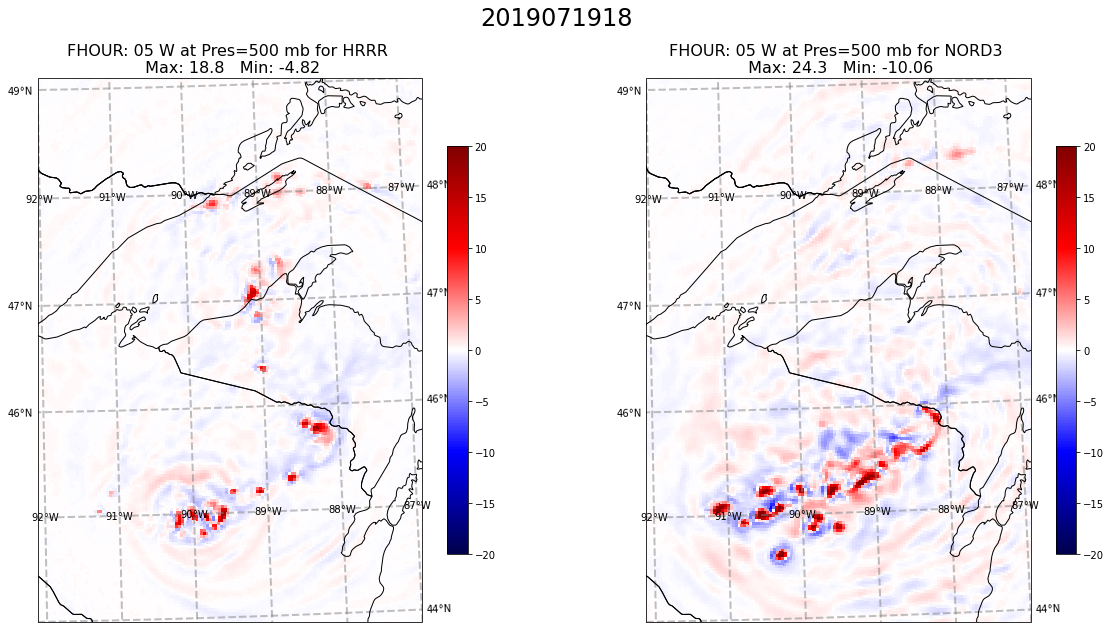

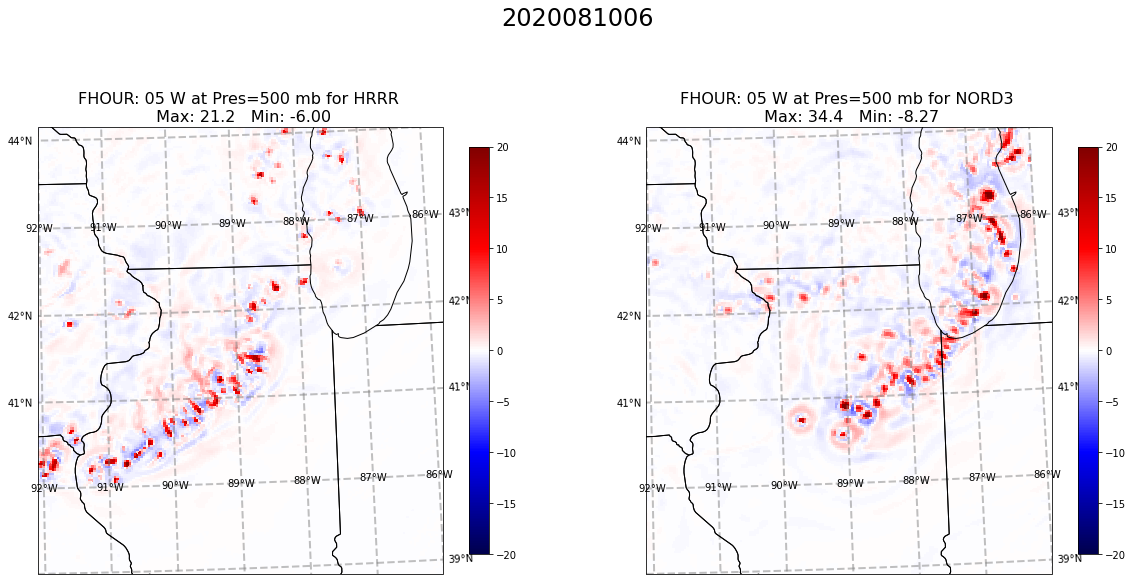

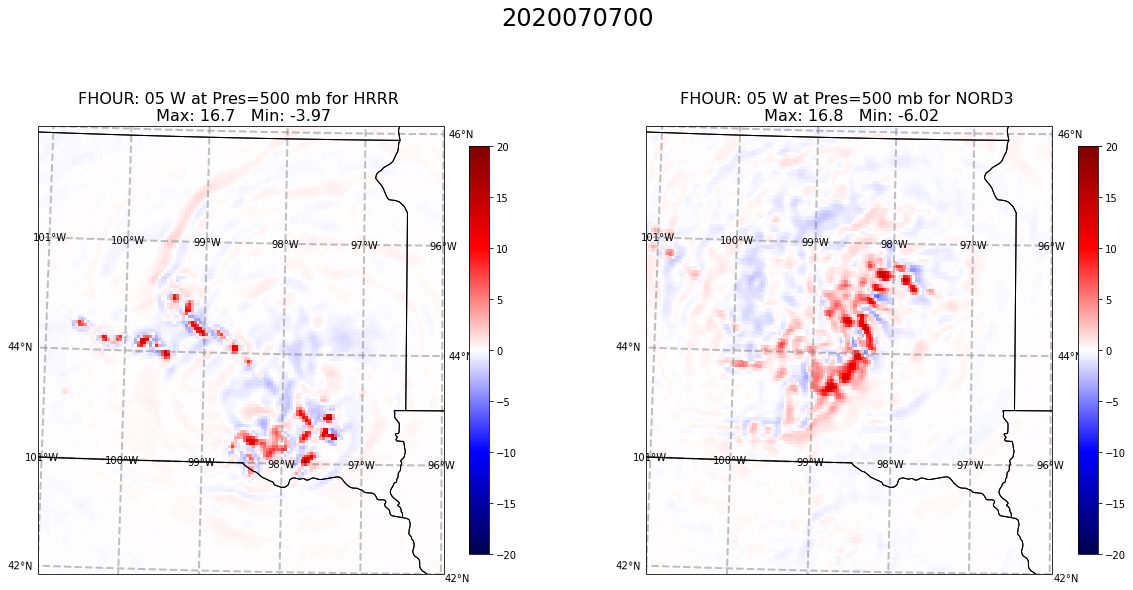

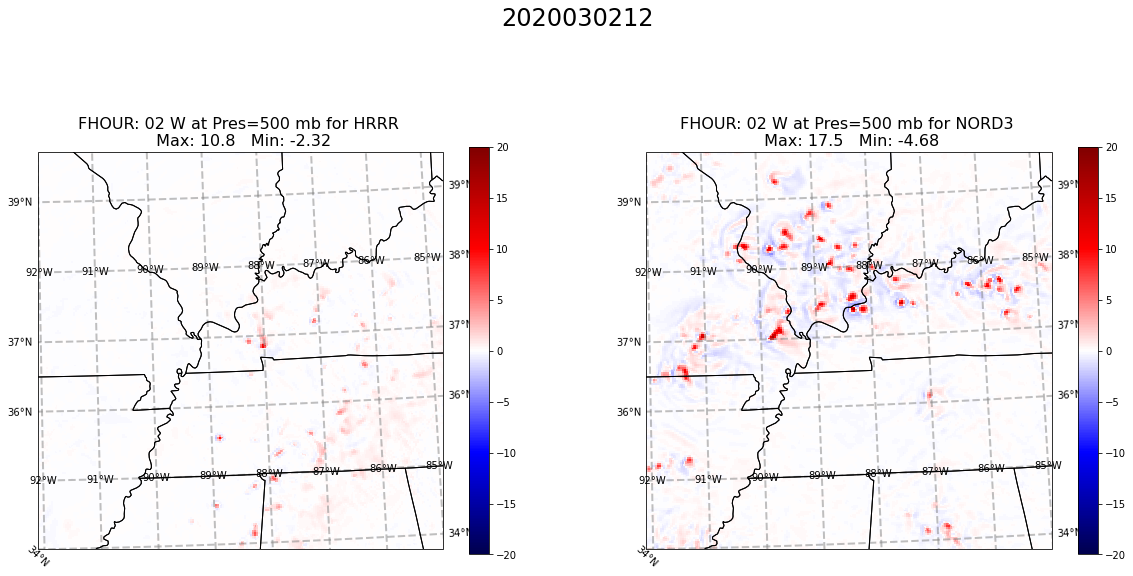

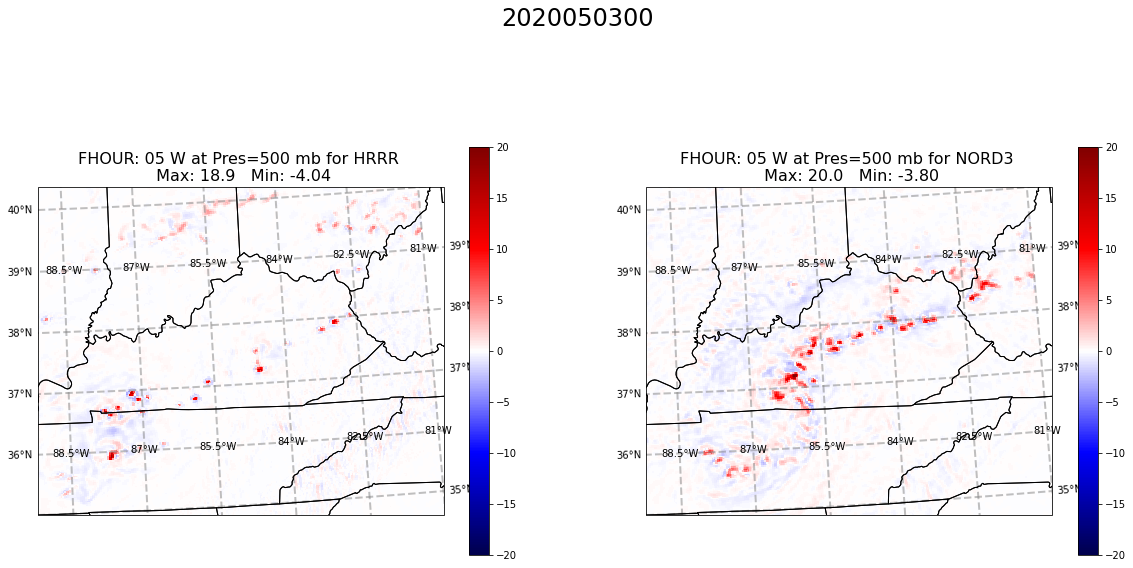

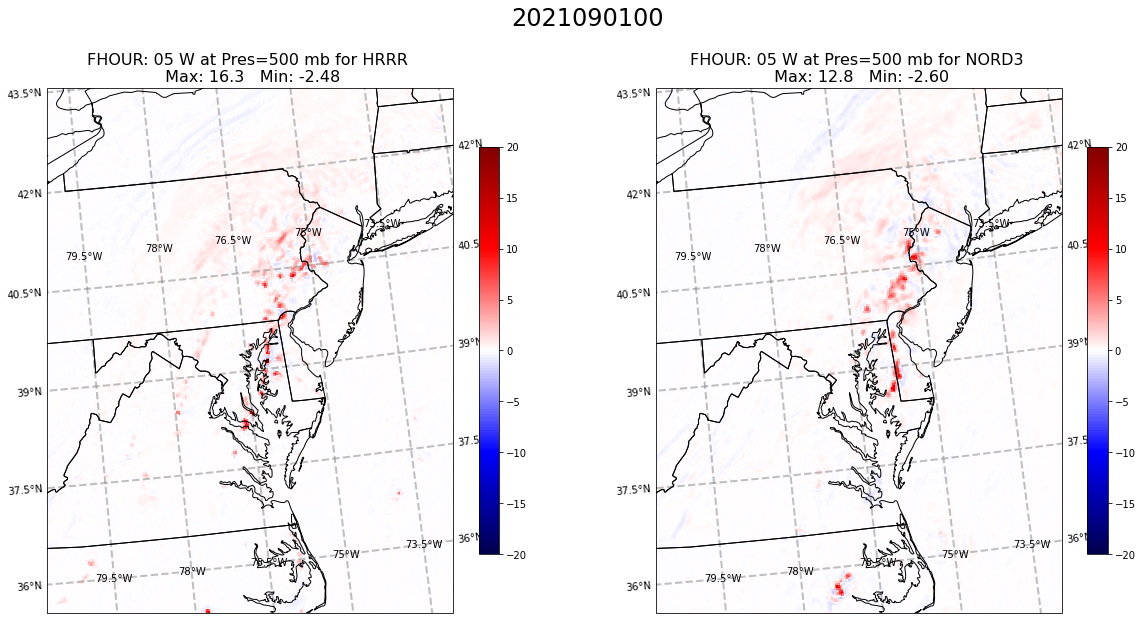

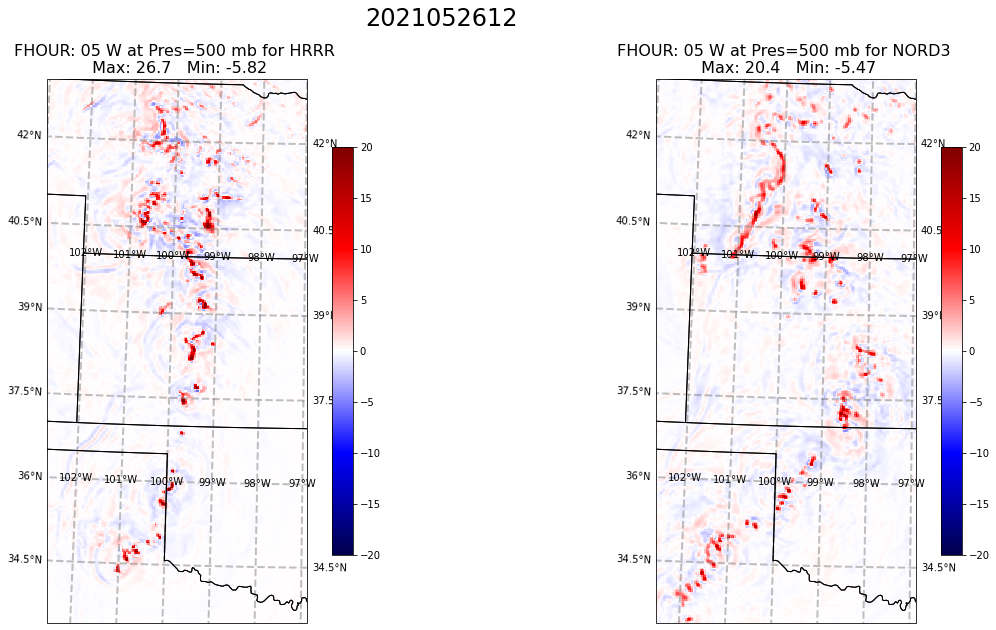

In [4]:
from input_default import input_all

input_dir  = input_all["input_dir"]
output_dir = input_all["output_dir"]

klevel     =  20

vmin       = -20.
vmax       =  20.
colormap   = 'seismic'
    
#------------------------------------------------------------------------------------
# cut and past from below here
#

print("\n====> Begin processing runs\n")

for day in input_all["cases"]:
        
    print("\n----> Processing for day:  %s \n" % (day))
    run_dir = str(os.path.join(input_dir, day))
    out_dir = str(os.path.join(output_dir, day))

    # Open data sets

    hrrr  = open_mfdataset_list(run_dir+"/hrrr",  "region_*.nc")
    rrfs1 = open_mfdataset_list(run_dir+"/nord3", "region_*.nc")

    # Plot the HRRR and RRFS data

    fig, axes = init_cartopy_plot(ncols=2, nrows=1, figsize=(20,10))

    # get zoom and fhour

    newlat = input_all["zoom"][day][0:2]
    newlon = input_all["zoom"][day][2:4]
    fhour  = input_all["zoom"][day][4]
    contours = None

    print("Processing %s for fhour %d" % (day, fhour))

    cb_info = plot_w_from_xarray(hrrr, fhour = fhour, klevel=klevel, title='HRRR', ax = axes[0], vmax=vmax, vmin=vmin, colormap=colormap, \
                                newlat=newlat, newlon=newlon, contours=contours)

    cb_info = plot_w_from_xarray(rrfs1, fhour = fhour, klevel=klevel, title='NORD3', ax = axes[1], vmax=vmax, vmin=vmin, colormap=colormap, \
                                newlat=newlat, newlon=newlon, contours=contours)

    plt.suptitle(day, fontsize=24)

    plt.savefig("%s_W_%3.3d_zoom.png" % (os.path.join(output_dir, day), hrrr.pres[klevel]/100), dpi=300, bbox_inches='tight')

    print("Saved %s_W_%3.3d_zoom.png" % (os.path.join(output_dir, day), hrrr.pres[klevel]/100))

        
print("\n====> Ended processing runs\n")
